# Exploratory Data Analysis (EDA) of Stock Market Data

This notebook guides you through the process of exploring the stock market data for insightful trends, patterns, and potential anomalies.

Sections:
1. Loading the Data
2. Overview of the Data
3. Trends in Stock Prices
4. Volume Analysis
5. Moving Averages
6. Correlations and Relationships

In [21]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats

In [8]:
# Ensure that plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

In [14]:
# 1. Loading the Data
# -------------------
# Load the preprocessed stock data from a CSV file
df = pd.read_csv("../data/preprocessedMasterDF.csv", parse_dates=['Date'])
df.set_index('Date', inplace=True)

# 2. Overview of the Data
# -----------------------

print(df.info())

# Get a summary of the dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56565 entries, 2019-03-21 04:00:00+00:00 to 2024-03-18 04:00:00+00:00
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                56565 non-null  float64
 1   High                56565 non-null  float64
 2   Low                 56565 non-null  float64
 3   Close               56565 non-null  float64
 4   Volume              56565 non-null  int64  
 5   ticker              56565 non-null  object 
 6   MA_5                56561 non-null  float64
 7   MA_10               56556 non-null  float64
 8   MA_20               56546 non-null  float64
 9   RSI                 56552 non-null  float64
 10  Bollinger Upper     56546 non-null  float64
 11  Bollinger Lower     56546 non-null  float64
 12  Volume Change Rate  56564 non-null  float64
 13  Daily Change        56565 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 6.5+ 

,Open,High,Low,Close,Volume,MA_5,MA_10,MA_20,RSI,Bollinger Upper,Bollinger Lower,Volume Change Rate,Daily Change
count,56565.000000,56565.000000,56565.000000,56565.000000,5.656500e+04,56561.000000,56556.000000,56546.000000,56552.000000,56546.000000,56546.000000,56564.000000,56565.000000
mean,142.803435,144.392053,141.197243,142.824747,2.140220e+07,142.829279,142.835063,142.846771,52.565061,153.244704,132.448839,0.096246,0.021312
std,111.192824,112.461426,109.901543,111.207839,3.265554e+07,111.035408,110.853434,110.498222,17.707839,120.633201,104.862185,2.975539,2.844051
min,3.625667,3.753033,3.362446,3.404901,8.516800e+04,3.776808,4.039180,4.065927,0.269584,4.528488,-493.286898,-0.986100,-76.099976
25%,54.000317,54.558789,53.412273,53.980000,4.271759e+06,54.030960,54.180165,54.481820,40.105404,58.259699,50.151294,-0.184264,-0.748223
50%,117.875501,119.051998,116.569529,117.901497,9.513100e+06,117.994550,118.086709,118.022361,52.891019,126.175968,109.372559,-0.014322,0.019704
75%,184.652146,186.770004,182.550003,184.795563,2.492610e+07,184.567996,184.820612,185.314635,65.452042,198.369869,172.257259,0.205763,0.820007
max,951.380005,974.000000,901.000000,926.690002,9.140820e+08,899.099805,890.184906,833.255737,99.737666,1395.761318,691.154885,637.558707,55.030029


In [15]:
# Forward fill missing values
df.fillna(method='ffill', inplace=True)

# If the first row still contains NaN, consider backfilling
df.fillna(method='bfill', inplace=True)


C:\Users\marah\AppData\Local\Temp\ipykernel_33012\2692318114.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\marah\AppData\Local\Temp\ipykernel_33012\2692318114.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


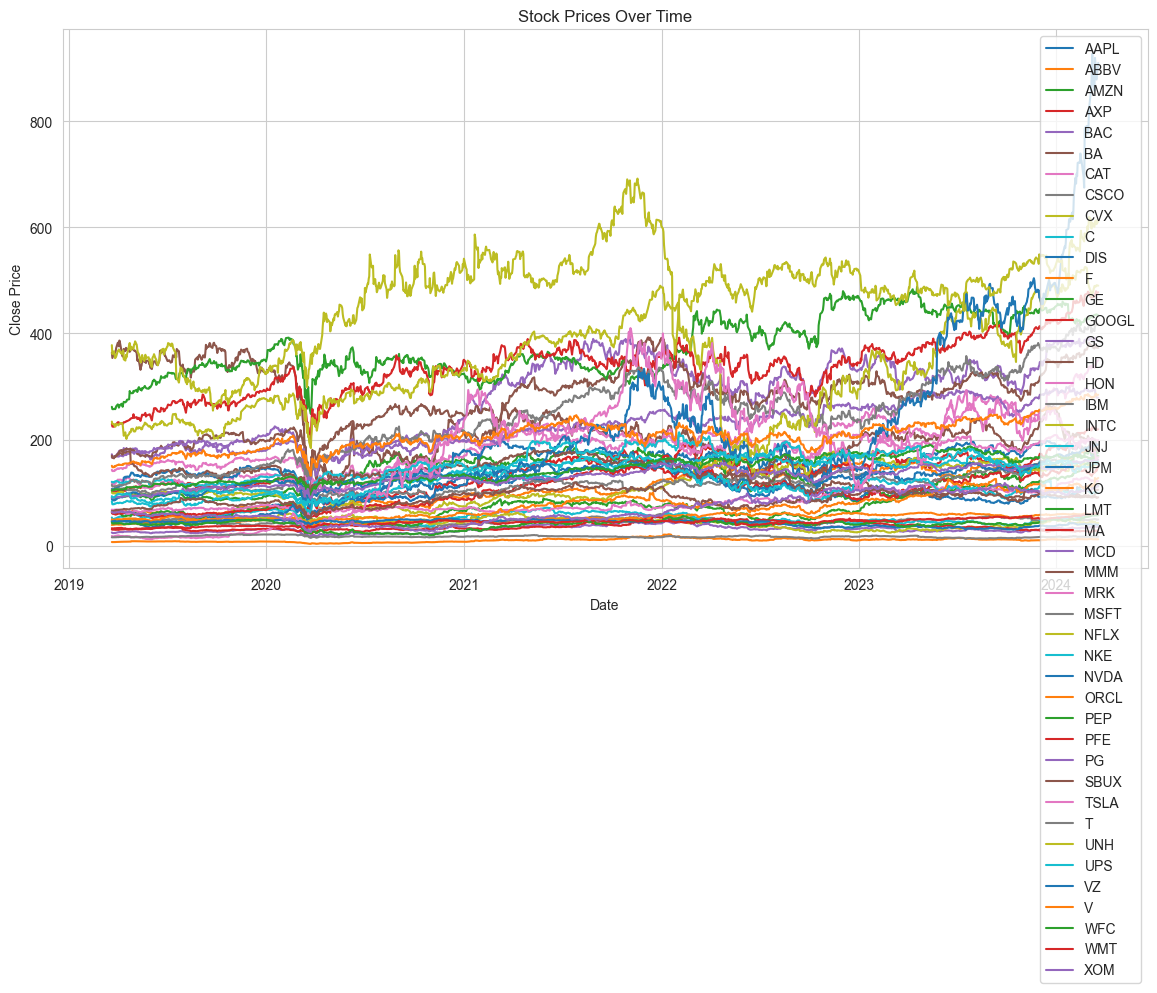

In [16]:
plt.figure(figsize=(14, 7))
for ticker in df['ticker'].unique():
    plt.plot(df[df['ticker'] == ticker].index, df[df['ticker'] == ticker]['Close'], label=ticker)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

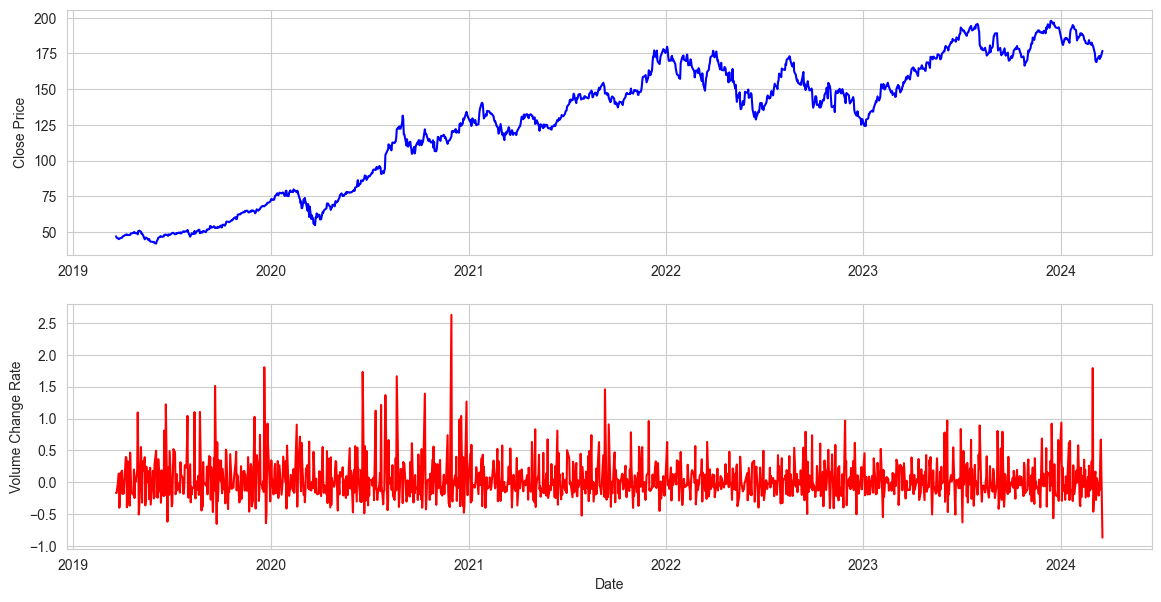

In [17]:
# Example for AAPL
aaplDf = df[df['ticker'] == 'AAPL']

plt.figure(figsize=(14, 7))
ax1 = plt.subplot(211)
ax1.plot(aaplDf.index, aaplDf['Close'], color='blue', label='Close Price')
ax1.set_ylabel('Close Price')

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(aaplDf.index, aaplDf['Volume Change Rate'], color='red', label='Volume Change Rate')
ax2.set_ylabel('Volume Change Rate')
ax2.set_xlabel('Date')

plt.show()

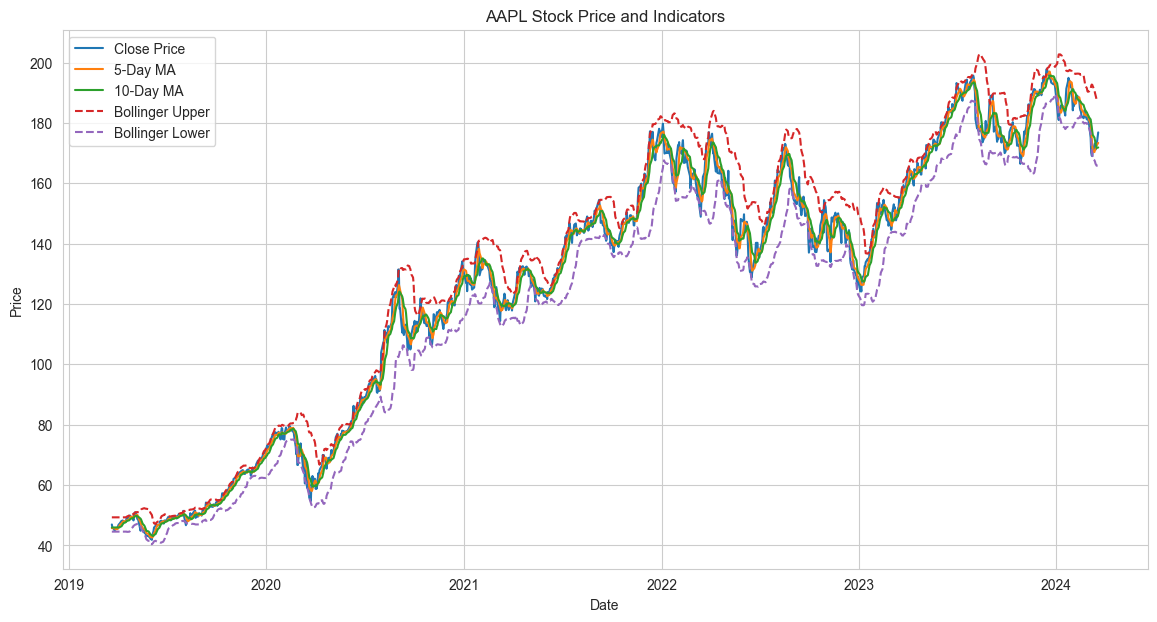

In [18]:
plt.figure(figsize=(14, 7))
plt.plot(aaplDf.index, aaplDf['Close'], label='Close Price')
plt.plot(aaplDf.index, aaplDf['MA_5'], label='5-Day MA')
plt.plot(aaplDf.index, aaplDf['MA_10'], label='10-Day MA')
plt.plot(aaplDf.index, aaplDf['Bollinger Upper'], label='Bollinger Upper', linestyle='--')
plt.plot(aaplDf.index, aaplDf['Bollinger Lower'], label='Bollinger Lower', linestyle='--')
plt.title('AAPL Stock Price and Indicators')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

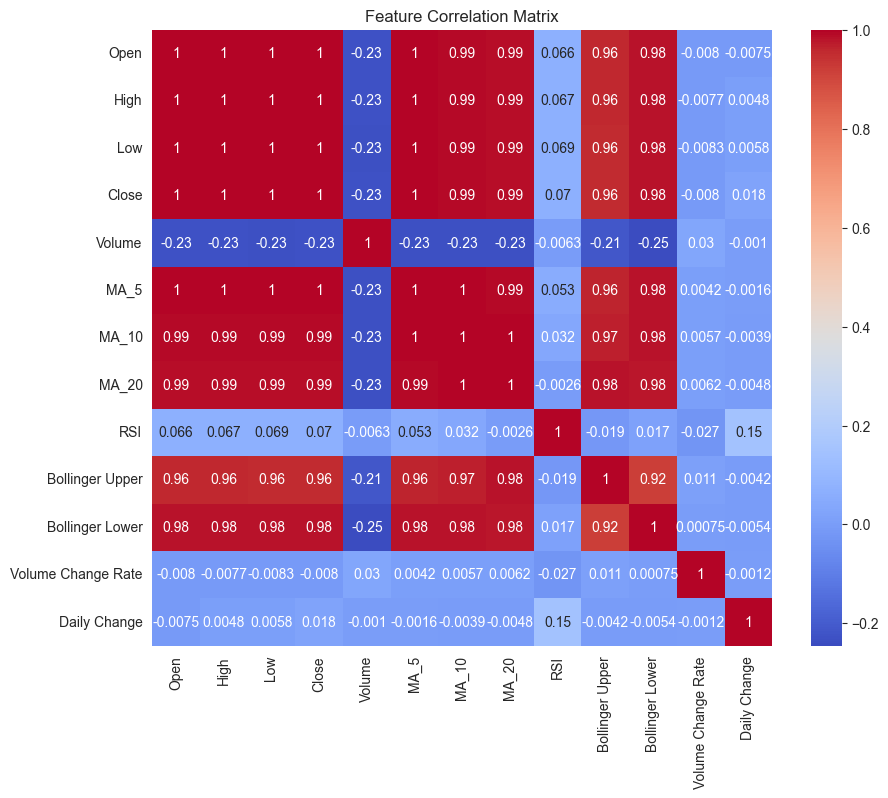

In [20]:
numericDf = df.select_dtypes(include=['float64', 'int64'])

correlationMatrix = numericDf.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [25]:
# Assume df is your preprocessed DataFrame with numeric features only
features = df.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
featuresScaled = scaler.fit_transform(features)

# Fit PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principalComponents = pca.fit_transform(featuresScaled)

# Convert to a DataFrame
principalDf = pd.DataFrame(data=principalComponents)
principalDf.head()

,0,1,2,3,4
0,-3.063448,-0.581550,2.013772,-4.939421,-0.450391
1,-2.969415,-0.047530,1.486214,-4.069157,0.192678
2,-2.996257,-0.124210,1.635493,-4.188968,0.097360
3,-3.061781,0.008490,1.911210,-4.868858,0.164111
4,-2.851110,-0.302759,0.893434,-2.639906,0.075058


In [28]:

# Calculate Z-scores
zScores = np.abs(stats.zscore(featuresScaled))

# Define an outlier as any data point where any feature has a Z-score greater than 3
outliers = (zScores > 3).any(axis=1)

# Filter the outliers
outliersDf = df[outliers]
cleanDf = df[~outliers]
cleanDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53346 entries, 2019-03-28 04:00:00+00:00 to 2024-03-18 04:00:00+00:00
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                53346 non-null  float64
 1   High                53346 non-null  float64
 2   Low                 53346 non-null  float64
 3   Close               53346 non-null  float64
 4   Volume              53346 non-null  int64  
 5   ticker              53346 non-null  object 
 6   MA_5                53346 non-null  float64
 7   MA_10               53346 non-null  float64
 8   MA_20               53346 non-null  float64
 9   RSI                 53346 non-null  float64
 10  Bollinger Upper     53346 non-null  float64
 11  Bollinger Lower     53346 non-null  float64
 12  Volume Change Rate  53346 non-null  float64
 13  Daily Change        53346 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 6.1+ 

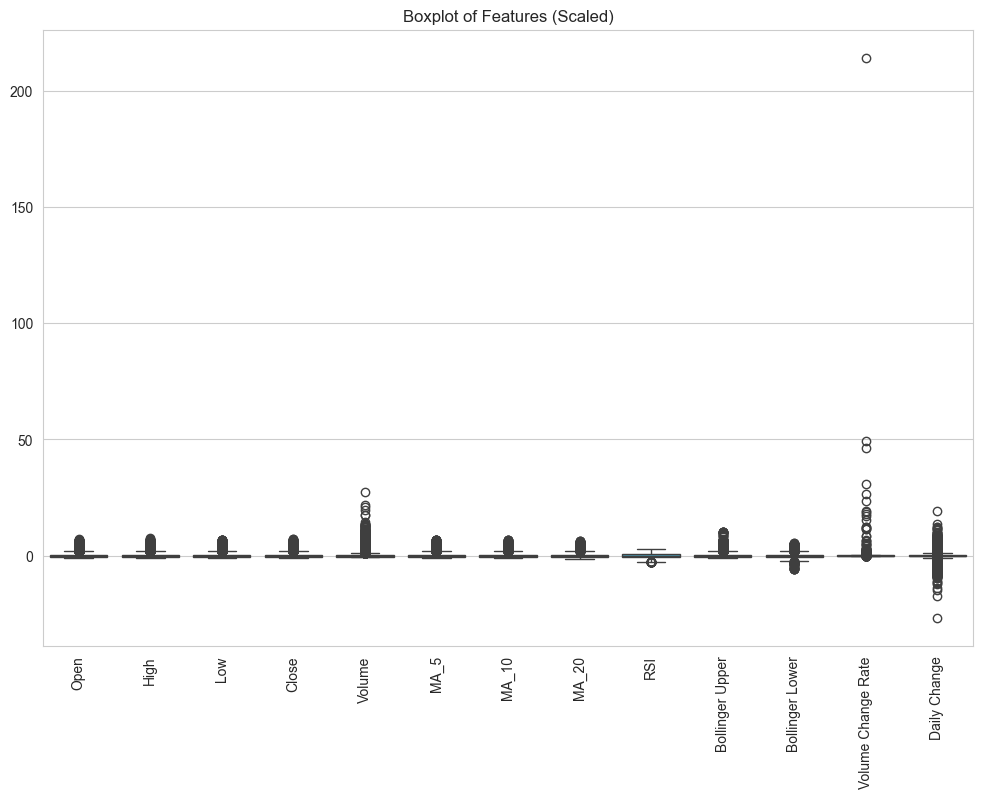

In [24]:

# Boxplot for visual inspection of outliers across features
plt.figure(figsize=(12, 8))
sns.boxplot(data=featuresScaled)
plt.xticks(ticks=np.arange(features.shape[1]), labels=features.columns, rotation=90)
plt.title('Boxplot of Features (Scaled)')
plt.show()